# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter ='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* total_images - количество фото в объявлении 
* last_price - последняя зафиксированная цена руб
* total_area - общая площадь м<sup>2
* first_day_exposition - дата публикации
* rooms - количество комнат
* ceiling_height - высота потолка м
* floors_total - количество этажей в доме
* living_area - жилая площадь м<sup>2
* floor - этаж                  
* is_apartment - является ли объект аппартаментами булев тип
* studio - является ли объект студией булев тип
* open_plan - свободная планировка булев тип
* kitchen_area - площадь кухни м<sup>2
* balcony - количество балконов
* locality_name - название населенного пункта, в котором находится дом
* airports_nearest - расстояние до ближайшего аэропорта м
* cityCenters_nearest - расстояние до центра города м
* parks_around3000 - количество парков в радиусе 3 км
* parks_nearest - расстояние до ближайшего парка м
* ponds_around3000 - количество прудов в радиусе 3 км
* ponds_nearest - расстояние до ближайшего пруда м
* days_exposition - сколько дней продержалось объявление

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


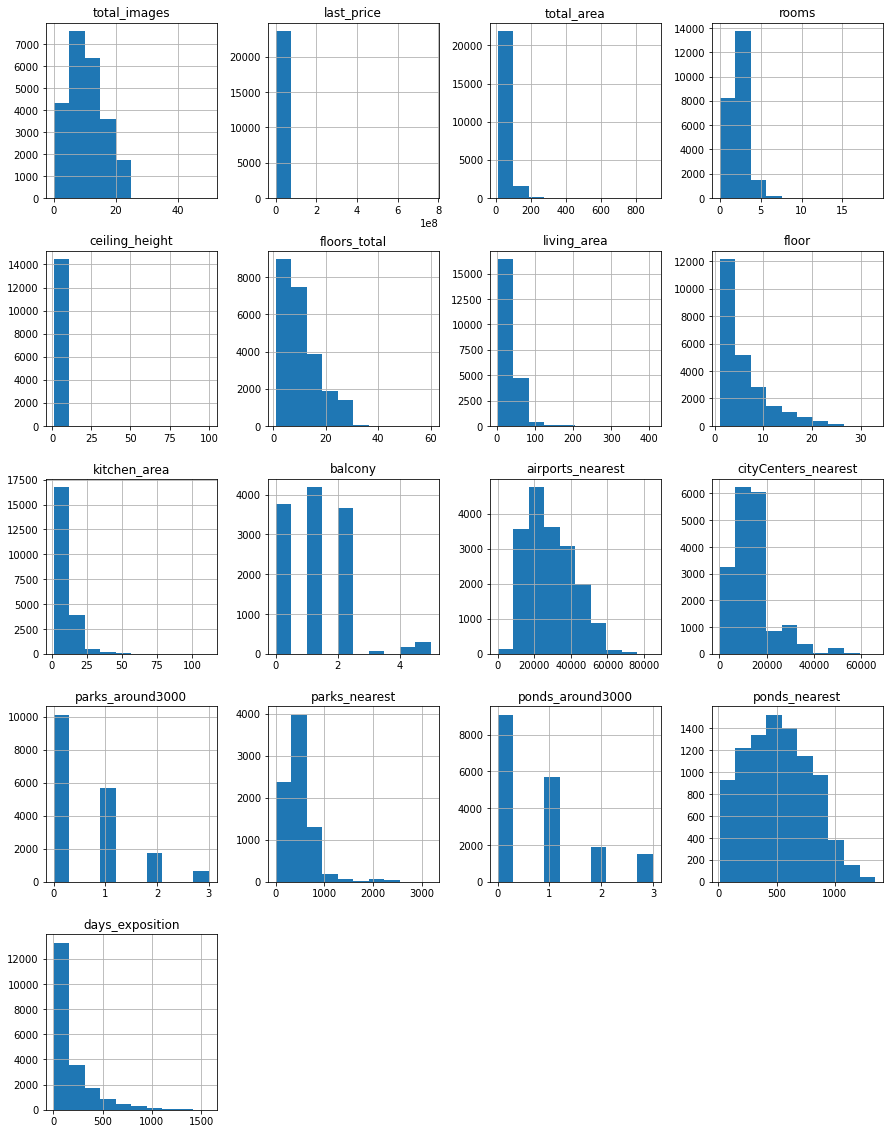

In [5]:
data.hist(figsize=(15, 20));

<AxesSubplot:>

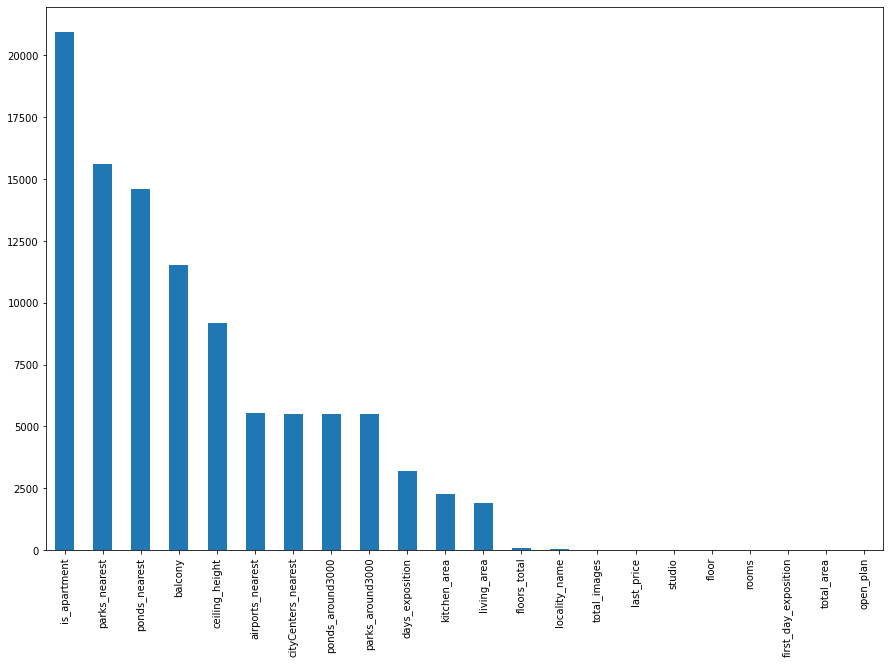

In [6]:
(data
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar',figsize=(15, 10))
)

**Промежуточные выводы**

* В данных достаточно много пропусков, особенно выделяется is_apartment, где более 20 000 пропусков
* В данных встречаются странные значения, например высота потолка в 100м или 1м, 60 этажный дом в Кронштадте и т.д.

Далее необходимо провести работу с нечитабельными данными и изучить пропуски, а также по возможности их заполнить

### Предобработка данных

#### Балконы

Начнем с заполнения пропусков. Предположим, что там где не указано количество балконов, их нет. Мое предположение основывается на том, что количество балконов является важным параметром для выбора квартиры и автор объявления обязательно указал бы значение. Также сейчас на сайте Яндекс.Недвижимость есть выбор балкон или лоджия, так что возможно nan значение связано с тем что в этих домах лоджия, а не балкон.


In [7]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [8]:
data['balcony'].fillna(0, inplace=True)

In [9]:
data['balcony'].isnull().sum()

0

In [10]:
data['balcony'] = data['balcony'].astype('int')

#### Аппартаменты

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [12]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Аппартаменты являются новым видом имущества для России, у них особые условия налогообложения и собственничества. После небольшого ресерча по статьям от РБК и СТРОИТЕЛЬСТВО.ru, а также изучению Яндекс.Недвижимость, становится ясно, что аппартаменты действительно продаются не так часто. Даже сейчас в СПБ в новостройках на продажу доступна покупка аппартаменов в 36 ЖК. Так что можно считать, что пропущенные значения не являются аппартаментами.

In [13]:
data['is_apartment'].fillna(False, inplace=True)

In [14]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [15]:
data['is_apartment'].dtype

dtype('bool')

#### Высота потолка

In [16]:
data['ceiling_height'].isna().sum()

9195

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [18]:
data['ceiling_height'].median()

2.65

In [19]:
(data
    .query('(ceiling_height > 5)|(ceiling_height < 2)')['ceiling_height']
    .value_counts()
    .sort_index()
)

1.00      1
1.20      1
1.75      1
5.20      1
5.30      2
5.50      1
5.60      1
5.80      1
6.00      1
8.00      3
8.30      1
10.30     1
14.00     1
20.00     1
22.60     1
24.00     1
25.00     7
26.00     1
27.00     8
27.50     1
32.00     2
100.00    1
Name: ceiling_height, dtype: int64

И так сегодня в России минимальной высотой потолков является 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. По данным Яндекс.недвижимости существует много предложений более 4 метров, а по запросу в поисковике можно увидеть что самый высокий потолок в Питере доходит до 5.1м. И так по моему нению необходимо:
* Для пропущенных значений вставить медианное значение 
* Допустим что могут существовать элитные двухярусные квартиры с высотой до 8 метров, а для промежутка с высотой от 8 до 24 удалим строки. Также удалим строки с высотой меньше 2.4 и строку с высотой 100.
* Строки с высотой от 24 до 32 выглядят как ошибки разряда, поэтому их мы поделим на 10

In [20]:
median = data['ceiling_height'].median()
data['ceiling_height'].fillna(median, inplace=True)

Спасибо за совет, в следующий раз обращу на это внимание. В этот раз боюсь не успеть выполнить в срок, т.к. нужно проводить еще одно исследование по выделению центра Питера.

In [21]:
data['ceiling_height'].isna().sum()

0

In [22]:
data.loc[(data['ceiling_height']>= 24)&(data['ceiling_height']<= 32), 'ceiling_height'] = data['ceiling_height']/10

In [23]:
data = data[(data['ceiling_height']>= 2.4)&(data['ceiling_height']<= 8)]

In [24]:
(data
    .query('(ceiling_height > 5)|(ceiling_height < 2)')['ceiling_height']
    .value_counts()
    .sort_index()
)

5.2    1
5.3    2
5.5    1
5.6    1
5.8    1
6.0    1
8.0    3
Name: ceiling_height, dtype: int64

#### Жилая площадь и площадь кухни

После того как я понял, что мой алгоритм создает аномалии и ошибки, я решил пересмотреть свой подход и разделил заполнение на 2 этапа:
1. Для начала заполнить те пропуски, в которых не хватает какой-то одной площади. Для этого мы посчитаем пропорцию по площади, которая отводится под санузлы и т. д. и сгруппируем ее по количеству комнат, так как если посмотреть видно, что это влияет на показатели каждой площади. Это необходимо нам чтобы учесть эту площадь при заполнении. Так от общей площади мы отнимем известную жилую или кухонную домножим на коэффициент и получим неизвестную.
2. Для тех случаев, где неизвестны обе площади выделим пропорции кухонь и жилой площади, сгруппируем медианы пропорций по комнатам и умножим на общую

После этого алгоритма также возникают аномалии в виде отриацтельного значения площади кухни. В них жилая площадь преобладает. Эти значения мы удалим как аномалии, т.к. их очень мало(71 штука). К сожалению я не смог придумать ничего лучше чем это, но в этот раз аномалий вышло меньше.

In [25]:
 data[data['kitchen_area']+data['living_area'] > 0.9 * data['total_area']] #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,...,6.4,1,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,2.65,5.0,90.2,4,False,...,16.0,0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5.0,42.2,2,False,...,6.0,1,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14.0,40.0,8,False,...,10.0,0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.0,2,False,...,15.3,0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [26]:
data[data['kitchen_area']+data['living_area'] > data['total_area']] #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,False,...,5.00,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,7.00,2,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,2.70,2.0,38.00,2,False,...,8.60,2,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,False,...,8.00,2,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.65,16.0,62.00,12,False,...,32.40,0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.65,5.0,44.00,5,False,...,8.00,1,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [27]:
data[data['kitchen_area'].isnull()]['rooms'].unique()

array([3, 1, 2, 0, 4, 7, 5, 6, 8, 9])

In [28]:
data[data['living_area'].isnull()]['rooms'].unique()

array([3, 2, 1, 4, 7, 0, 5, 6, 9])

Уберем из датасета аномальные значения, в которых сумма плоащдей кухни и жилой больше чем общая площадь.

In [29]:
data = data[~(data['kitchen_area']+data['living_area'] > data['total_area'])]

In [30]:
full_area_info_data = data.dropna(subset=['kitchen_area','living_area'])
full_area_info_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [31]:
full_area_info_data['other_area_part'] = 1 -((full_area_info_data.living_area + full_area_info_data.kitchen_area) / 
                                                  full_area_info_data.total_area)

/tmp/ipykernel_916/3782806171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_area_info_data['other_area_part'] = 1 -((full_area_info_data.living_area + full_area_info_data.kitchen_area) /


In [32]:
full_area_info_data['other_area_part'].describe()

count    20895.000000
mean         0.251746
std          0.068060
min          0.000000
25%          0.213889
50%          0.250000
75%          0.289349
max          0.863309
Name: other_area_part, dtype: float64

In [33]:
full_area_info_data['kitchen_area'].describe()

count    20895.000000
mean        10.507240
std          5.832081
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [34]:
data['kitchen_area'].describe()

count    21334.000000
mean        10.560476
std          5.894835
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [35]:
median_other_area_part = full_area_info_data.groupby(by='rooms')['other_area_part'].median().to_dict()
median_other_area_part

{1: 0.2682926829268293,
 2: 0.246,
 3: 0.23287671232876717,
 4: 0.22354553442496283,
 5: 0.22890990441326015,
 6: 0.22274376417233555,
 7: 0.22499999999999998,
 8: 0.20019020446980518,
 9: 0.31126896997093956,
 10: 0.24344827586206896,
 11: 0.2230525600478121,
 12: 0.42033333333333334,
 14: 0.2756693406615611,
 15: 0.13728813559322028,
 16: 0.2851851851851852,
 19: 0.2202349172450614}

In [36]:
data.loc[(data['living_area'].isnull()) 
         & ~(data['kitchen_area'].isnull()), 'living_area'] = (data['total_area'] *  
                                                            (1-data['rooms'].map(median_other_area_part)) - data['kitchen_area'])

In [37]:
data.loc[(data['kitchen_area'].isnull()) 
         & ~(data['living_area'].isnull()), 'kitchen_area'] = (data['total_area'] *  
                                                            (1-data['rooms'].map(median_other_area_part)) - data['living_area'])

In [38]:
data.loc[(data['kitchen_area'].isnull()) 
         & (data['living_area'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,False,...,NaN,0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.55,16.0,NaN,15,False,...,NaN,1,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23642,14,5950000.0,80.3,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,...,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [39]:
full_area_info_data['living_area_part'] = (full_area_info_data.living_area / 
                                                  full_area_info_data.total_area)

/tmp/ipykernel_916/2176833247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_area_info_data['living_area_part'] = (full_area_info_data.living_area /


In [40]:
median_living_area = full_area_info_data.groupby(by='rooms')['living_area_part'].median().to_dict()
median_living_area

{1: 0.47904191616766467,
 2: 0.5849056603773585,
 3: 0.6312937405177899,
 4: 0.6589902912621359,
 5: 0.6506532554618214,
 6: 0.6781746031746032,
 7: 0.6816702819956616,
 8: 0.6893617021276596,
 9: 0.6282513005202081,
 10: 0.6531034482758621,
 11: 0.7100928114264657,
 12: 0.4552222222222222,
 14: 0.6486946594192649,
 15: 0.6932203389830508,
 16: 0.6666666666666666,
 19: 0.7060864922584089}

In [41]:
data['living_area'].fillna(data['total_area'] * data['rooms'].map(median_living_area), inplace = True)

In [42]:
full_area_info_data['kitchen_area_part'] = (full_area_info_data.kitchen_area / 
                                                    full_area_info_data.total_area)

/tmp/ipykernel_916/1398412131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_area_info_data['kitchen_area_part'] = (full_area_info_data.kitchen_area /


In [43]:
median_kitchen_area = full_area_info_data.groupby(by='rooms')['kitchen_area_part'].median().to_dict()
median_kitchen_area

{1: 0.24705882352941178,
 2: 0.16049382716049382,
 3: 0.12851776404670445,
 4: 0.11205108026899413,
 5: 0.10612275747394169,
 6: 0.09975124378109454,
 7: 0.08366533864541832,
 8: 0.1091703056768559,
 9: 0.04961984793917567,
 10: 0.09162424803331791,
 11: 0.0668546285257222,
 12: 0.12444444444444444,
 14: 0.07563599991917395,
 15: 0.1694915254237288,
 16: 0.04814814814814815,
 19: 0.07367859049652963}

In [44]:
data['kitchen_area'].fillna(data['total_area'] * data['rooms'].map(median_kitchen_area), inplace = True)

In [45]:
data[data['kitchen_area']+data['living_area'] > 0.9*data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,...,6.4,1,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
354,20,7030000.0,42.6,2017-11-20T00:00:00,2,2.70,11.0,29.0,2,False,...,10.0,0,Санкт-Петербург,34496.0,15595.0,1.0,513.0,3.0,222.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,2.65,5.0,90.2,4,False,...,16.0,0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5.0,42.2,2,False,...,6.0,1,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14.0,40.0,8,False,...,10.0,0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.0,2,False,...,15.3,0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [46]:
data = data[data['kitchen_area']>0]

In [47]:
data['kitchen_area'].describe()

count    23337.000000
mean        10.500545
std          5.992560
min          0.024390
25%          7.000000
50%          9.100000
75%         12.000000
max        143.014236
Name: kitchen_area, dtype: float64

-------------------------------------------------------------------

In [48]:
data = data.round({'living_area': 2, 'kitchen_area': 2, 'total_area': 2})

In [49]:
# Check
data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
220,37.0,28.0,9.0
319,59.7,47.4,6.4
354,42.6,29.0,10.0
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


#### Количество этажей и название населенного пункта 

Эти данные тяжело востановить, поэтому удалим строки с пропущенными знчаениями

In [50]:
data.dropna(subset=['floors_total', 'locality_name'],inplace = True)

#### Название населенного пункта

In [51]:
len(data['locality_name'].unique())

362

In [52]:
data['locality_processed'] = data['locality_name'].str.lower().str.replace('ё','е')

In [53]:
def locality_proces(locality_name):
    fragment = ['коттеджный', 'городской','городского', 'типа', 'имени', 'при', 'железнодорожной']
    words = str(locality_name).split(' ')
    new_words = []
    for word in words:
        if word not in fragment:
            new_words.append(word)
    locality = " ".join(str(x) for x in new_words)
    return locality

In [54]:
locality_proces('поселок лисий нос')

'поселок лисий нос'

In [55]:
locality_proces('поселок городского типа павлово')

'поселок павлово'

In [56]:
data['locality_processed'] = data['locality_processed'].apply(locality_proces)

In [57]:
locality_str = " ".join(data['locality_processed'].unique())

In [58]:
list_word = locality_str.split()
series = pd.Series(dict(Counter(list_word)))
series[series > 1]

поселок         154
мурино            2
деревня         106
кудрово           2
бор               6
федоровское       2
садовое           4
товарищество      5
новая             2
ропша             2
село             10
старая            4
никольское        2
новый             2
романовка         2
павлово           2
большая           3
рахья             2
колпаны           2
ладога            2
зимитицы          2
бегуницы          2
малое             2
станции           5
калитино          2
приладожский      2
щеглово           2
рабитицы          2
гарболово         2
любань            2
красная           2
горка             2
громово           2
dtype: int64

Дальнейшее деление пунктов является трудоемкой задачей, поэтому я изменю вручную значения для Кудрово и Мурино, а остальное оставлю как есть.

In [59]:
data['locality_processed'] = data['locality_processed'].where(~(data['locality_processed']=='мурино'),'поселок мурино')

In [60]:
data['locality_processed'] = data['locality_processed'].where(~(data['locality_processed']=='кудрово'),'деревня кудрово')

In [61]:
len(data['locality_processed'].unique())

315

Так я сократил количество населенных пунктов до 317

#### Дата объявления

In [62]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Картографические свойства

Их пропуск объсяняется ошибкой выгрузкой данных. Их тяжело восстанавливать по имеющимся данным, поэтому оставим эти пропуски

#### Число дней объявления

Вероятно это ошибка выгрузки, либо объявления все еще существуют. Оставим эти данные как есть.

In [63]:
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')

In [64]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23207 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23207 non-null  int64         
 1   last_price            23207 non-null  float64       
 2   total_area            23207 non-null  float64       
 3   first_day_exposition  23207 non-null  datetime64[ns]
 4   rooms                 23207 non-null  int64         
 5   ceiling_height        23207 non-null  float64       
 6   floors_total          23207 non-null  float64       
 7   living_area           23207 non-null  float64       
 8   floor                 23207 non-null  int64         
 9   is_apartment          23207 non-null  bool          
 10  studio                23207 non-null  bool          
 11  open_plan             23207 non-null  bool          
 12  kitchen_area          23207 non-null  float64       
 13  balcony         

In [65]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,207.00","23,207.00","23,207.00","20,070.00","23,207.00","23,207.00","23,207.00","23,207.00","23,207.00"
min,1.00,13.00,2.40,1.00,"12,190.00",2.00,0.02,1.00,1.00
max,19.00,900.00,8.00,"1,580.00","763,000,000.00",429.02,143.01,33.00,60.00


In [66]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7913
2,7857
3,5755
4,1168
5,322
6,103
7,59
8,11
9,8
10,3


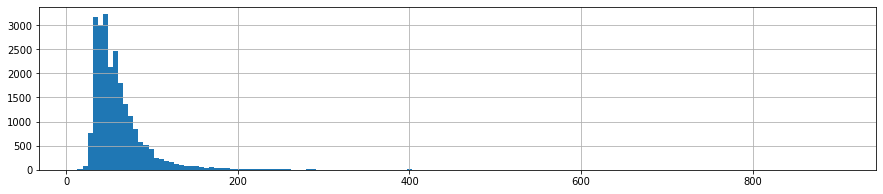

In [67]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

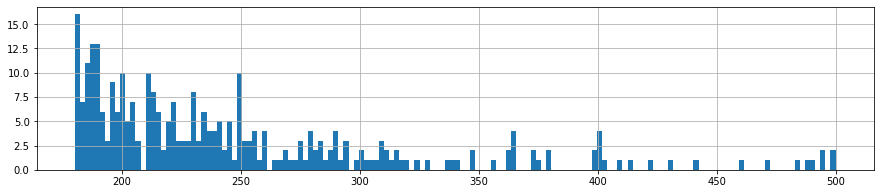

In [68]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [69]:
# check
data.total_area.value_counts(bins =20)

(12.112, 57.35]    13553
(57.35, 101.7]      7904
(101.7, 146.05]     1133
(146.05, 190.4]      365
(190.4, 234.75]      108
(234.75, 279.1]       61
(279.1, 323.45]       37
(323.45, 367.8]       13
(367.8, 412.15]       13
(456.5, 500.85]        9
(412.15, 456.5]        4
(589.55, 633.9]        4
(500.85, 545.2]        2
(855.65, 900.0]        1
(545.2, 589.55]        0
(633.9, 678.25]        0
(678.25, 722.6]        0
(722.6, 766.95]        0
(766.95, 811.3]        0
(811.3, 855.65]        0
Name: total_area, dtype: int64

In [70]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,28.00,2.50,4.00,"1,000,000.00",12.93,4.45,1.00,2.00
0.5,2.00,52.00,2.65,96.00,"4,650,000.00",30.00,9.04,4.00,9.00
0.9,3.00,94.00,3.00,462.00,"10,990,000.00",55.30,15.60,13.00,22.00
0.9976,7.00,309.79,4.00,"1,312.83","82,000,000.00",187.00,50.00,25.00,27.00


#### Удаление аномалий

##### Комнаты

In [71]:
data.rooms.value_counts().to_frame()

,rooms
1,7913
2,7857
3,5755
4,1168
5,322
6,103
7,59
8,11
9,8
10,3


Удалим из нашей выброки те строки, в которых больше 7 комнат.

In [72]:
data = data[data['rooms'] <=7]

In [73]:
data.shape[0]

23177

##### Общая площадь

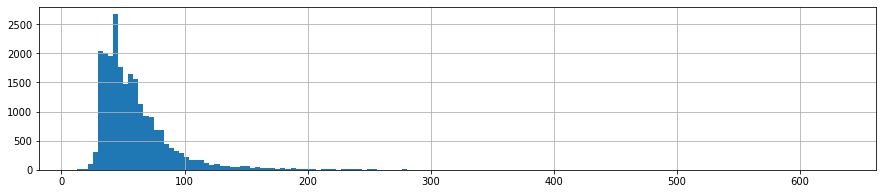

In [74]:
data.total_area.hist(bins = 150, figsize = (15,3));

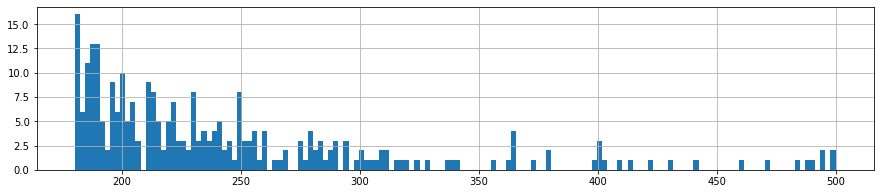

In [75]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

Удалим из нашей выброки те строки, в которых общая площадь больше 200 м<sup>2

In [76]:
data = data[data['total_area'] <=200]

In [77]:
data.shape[0]

22980

##### Высота потолков

In [78]:
data.ceiling_height.value_counts(bins =10)

(2.3930000000000002, 2.96]    20519
(2.96, 3.52]                   2235
(3.52, 4.08]                    192
(4.08, 4.64]                     25
(4.64, 5.2]                       3
(7.44, 8.0]                       3
(5.2, 5.76]                       2
(5.76, 6.32]                      1
(6.32, 6.88]                      0
(6.88, 7.44]                      0
Name: ceiling_height, dtype: int64

In [79]:
(
    data[['ceiling_height']]
    .quantile( .9976)  
)

ceiling_height    4.0
Name: 0.9976, dtype: float64

Удалим из нашей выброки те строки, в которых высота потолков больше 4 м

In [80]:
data = data[data['ceiling_height'] <=4]

In [81]:
data.shape[0]

22945

##### Число дней объвяления

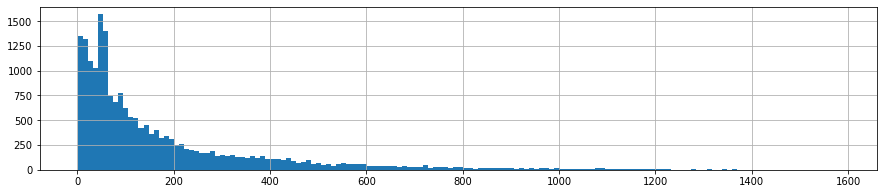

In [82]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

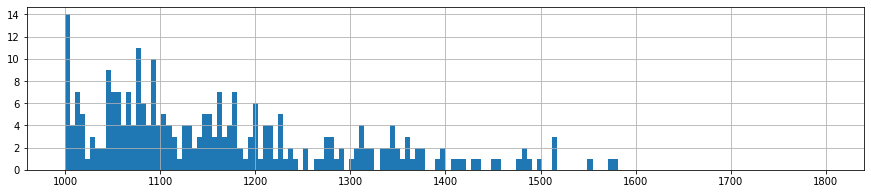

In [83]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (1000,1800));

In [84]:
data.days_exposition.value_counts(bins =20)

(-0.58, 79.95]       8782
(79.95, 158.9]       4081
(158.9, 237.85]      2182
(237.85, 316.8]      1273
(316.8, 395.75]       970
(395.75, 474.7]       716
(474.7, 553.65]       477
(553.65, 632.6]       359
(632.6, 711.55]       248
(711.55, 790.5]       195
(790.5, 869.45]       140
(869.45, 948.4]       119
(948.4, 1027.35]       91
(1027.35, 1106.3]      85
(1106.3, 1185.25]      57
(1185.25, 1264.2]      31
(1264.2, 1343.15]      26
(1343.15, 1422.1]      21
(1422.1, 1501.05]       9
(1501.05, 1580.0]       6
Name: days_exposition, dtype: int64

In [85]:
(
    data[['days_exposition']]
    .quantile([.90, .95, .9976])  
)

,days_exposition
0.9000,456.3000
0.9500,643.0000
0.9976,1309.9576


In [86]:
data = data[(data['days_exposition']<=1300)|(data['days_exposition'].isnull())]

In [87]:
data.shape[0]

22895

##### Цена квартиры

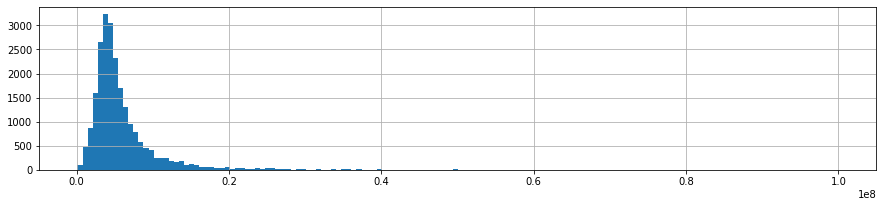

In [88]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (100000,100000000));

In [89]:
data.last_price.value_counts(bins = 20)

(-317797.811, 16511580.5]     22108
(16511580.5, 33010971.0]        635
(33010971.0, 49510361.5]         95
(49510361.5, 66009752.0]         34
(66009752.0, 82509142.5]         13
(82509142.5, 99008533.0]          5
(115507923.5, 132007314.0]        2
(280501828.5, 297001219.0]        1
(313500609.5, 330000000.0]        1
(132007314.0, 148506704.5]        1
(148506704.5, 165006095.0]        0
(181505485.5, 198004876.0]        0
(198004876.0, 214504266.5]        0
(214504266.5, 231003657.0]        0
(231003657.0, 247503047.5]        0
(247503047.5, 264002438.0]        0
(264002438.0, 280501828.5]        0
(99008533.0, 115507923.5]         0
(297001219.0, 313500609.5]        0
(165006095.0, 181505485.5]        0
Name: last_price, dtype: int64

In [90]:
(
    data[['last_price']]
    .quantile([ 0.05,.90, .95, .9976])  
)

,last_price
0.0500,1860000.0
0.9000,10499600.0
0.9500,14000000.0
0.9976,49905440.0


In [91]:
data.last_price.describe()

count    2.289500e+04
mean     6.034581e+06
std      6.220835e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [92]:
data = data[(data['last_price']<=40000000)&(data['last_price'] >= 500000)]

In [93]:
data.shape[0]

22796

##### Жилая площадь

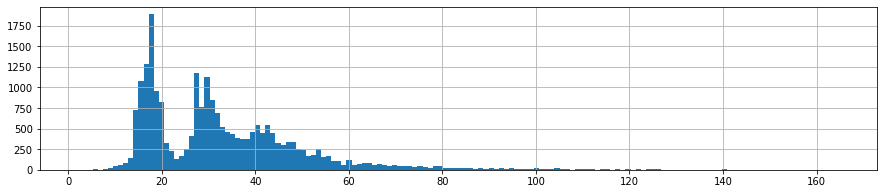

In [94]:
data.living_area.hist(bins = 150, figsize = (15,3));

In [95]:
data.living_area.value_counts(bins = 20)

(26.405, 34.54]      5763
(10.135, 18.27]      5288
(34.54, 42.675]      3167
(18.27, 26.405]      3125
(42.675, 50.81]      2622
(50.81, 58.945]      1155
(58.945, 67.08]       600
(67.08, 75.215]       361
(75.215, 83.35]       225
(83.35, 91.485]       134
(91.485, 99.62]       104
(99.62, 107.755]       79
(1.836, 10.135]        65
(107.755, 115.89]      41
(115.89, 124.025]      30
(124.025, 132.16]      21
(132.16, 140.295]       7
(140.295, 148.43]       6
(156.565, 164.7]        2
(148.43, 156.565]       1
Name: living_area, dtype: int64

In [96]:
data = data[data['living_area']<=120]

In [97]:
data.shape[0]

22745

##### Площадь кухни

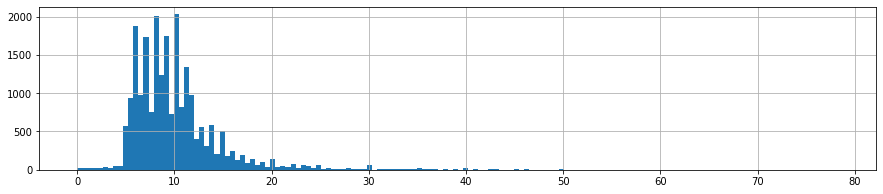

In [98]:
data.kitchen_area.hist(bins = 150, figsize = (15,3));

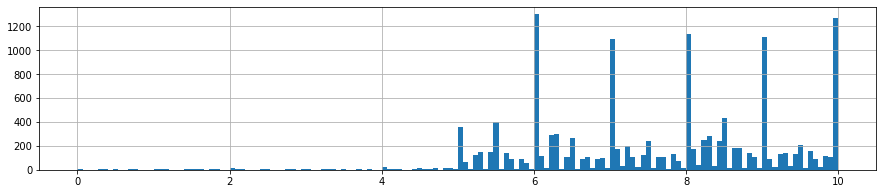

In [99]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range=(0,10));

In [100]:
data.kitchen_area.describe()

count    22745.000000
mean        10.196128
std          5.061900
min          0.020000
25%          7.000000
50%          9.000000
75%         11.600000
max         78.310000
Name: kitchen_area, dtype: float64

In [101]:
data.kitchen_area.value_counts(bins = 20)

(7.849, 11.764]     10093
(3.935, 7.849]       6932
(11.764, 15.678]     3545
(15.678, 19.592]      989
(19.592, 23.507]      457
(23.507, 27.422]      195
(-0.0593, 3.935]      182
(27.422, 31.336]      137
(31.336, 35.251]       66
(35.251, 39.165]       50
(39.165, 43.08]        44
(43.08, 46.994]        24
(46.994, 50.909]       12
(50.909, 54.823]        6
(54.823, 58.738]        5
(62.652, 66.566]        5
(58.738, 62.652]        2
(74.396, 78.31]         1
(66.566, 70.481]        0
(70.481, 74.396]        0
Name: kitchen_area, dtype: int64

In [102]:
data = data[(data['kitchen_area']<=40)&(data['kitchen_area'] >= 3.5)]

In [103]:
data.shape[0]

22501

##### Количество этажей в доме

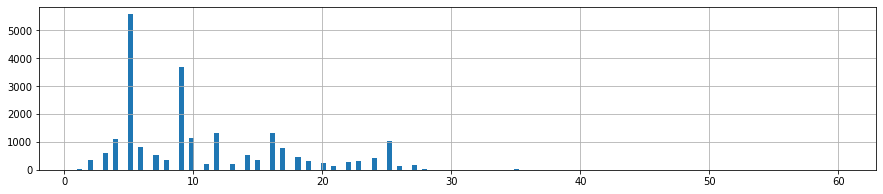

In [104]:
data.floors_total.hist(bins = 150, figsize = (15,3));

In [105]:
data.floors_total.value_counts(bins = 20)

(3.95, 6.9]      7487
(6.9, 9.85]      4576
(9.85, 12.8]     2663
(15.75, 18.7]    2586
(24.6, 27.55]    1290
(12.8, 15.75]    1109
(21.65, 24.6]    1036
(0.94, 3.95]     1001
(18.7, 21.65]     704
(33.45, 36.4]      24
(27.55, 30.5]      22
(51.15, 54.1]       1
(30.5, 33.45]       1
(57.05, 60.0]       1
(39.35, 42.3]       0
(42.3, 45.25]       0
(45.25, 48.2]       0
(48.2, 51.15]       0
(36.4, 39.35]       0
(54.1, 57.05]       0
Name: floors_total, dtype: int64

In [106]:
data = data[data['floors_total']<=30]

In [107]:
'Датасет сократился на: {:.2%}'.format(1 - data.shape[0]/23698)

'Датасет сократился на: 5.16%'

In [108]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,474.00","22,474.00","22,474.00","19,476.00","22,474.00","22,474.00","22,474.00","22,474.00","22,474.00"
min,1.00,15.00,2.40,1.00,"500,000.00",2.00,3.50,1.00,1.00
max,7.00,200.00,4.00,"1,299.00","40,000,000.00",120.00,40.00,27.00,29.00


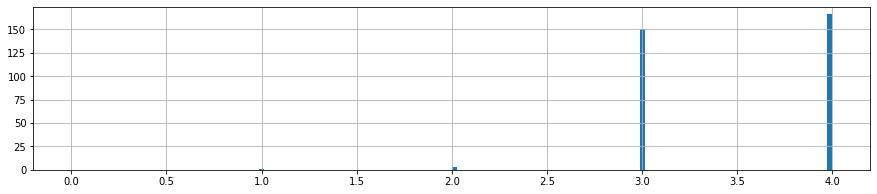

In [109]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (0, 4));

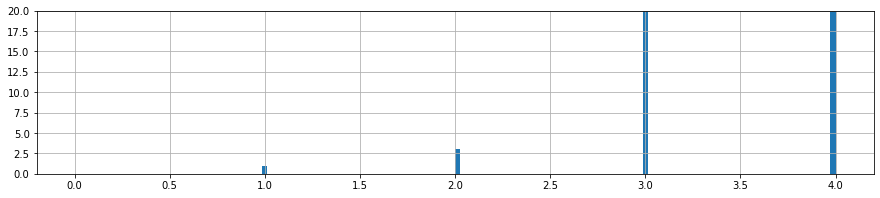

In [110]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (0, 4))
plt.ylim(0,20);

### Посчитайте и добавьте в таблицу¶


 Цена одного квадратного метра:

In [111]:
data['price_per_m'] = round(data['last_price'] / data['total_area'], 1)

День, месяц и год публикации объявления:


In [112]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»):

In [113]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Расстояние в км до центра города:

In [114]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_processed,price_per_m,day,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,санкт-петербург,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,81.0,поселок шушары,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,2.0,574.0,558.0,санкт-петербург,92785.7,3,8,2015,другой,14.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,55.0,поселок янино-1,95065.8,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,155.0,поселок парголово,99195.7,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,...,3.0,381.0,NaN,санкт-петербург,72490.8,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,NaN,NaN,45.0,тосно,52542.4,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,NaN,NaN,NaN,село рождествено,44091.7,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,34.57,12,False,...,3.0,196.0,602.0,санкт-петербург,149511.4,1,3,2017,другой,10.0


###  Исследовательский анализ данных

#### Общий анализ

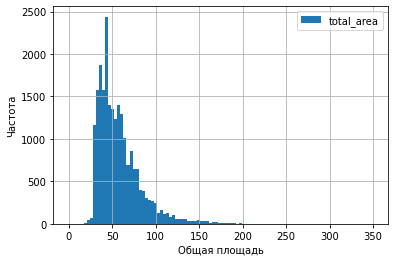

In [115]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,350))
data['total_area'].describe()
plt.xlabel('Общая площадь');
plt.ylabel('Частота');

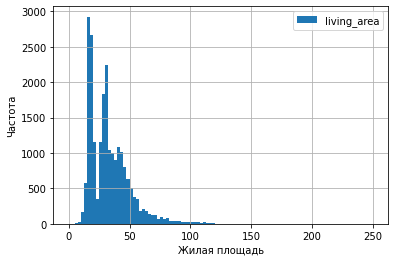

In [116]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, range = (0,250))
data['living_area'].describe()
plt.xlabel('Жилая площадь');
plt.ylabel('Частота');

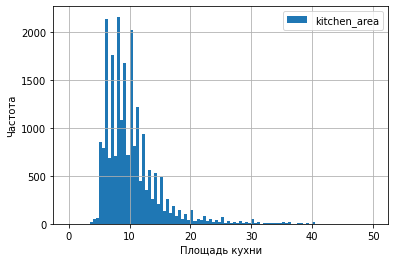

In [117]:
data.plot(y ='kitchen_area', kind = 'hist', bins = 100, grid=True, range = (0,50))
data['kitchen_area'].describe()
plt.xlabel('Площадь кухни');
plt.ylabel('Частота');

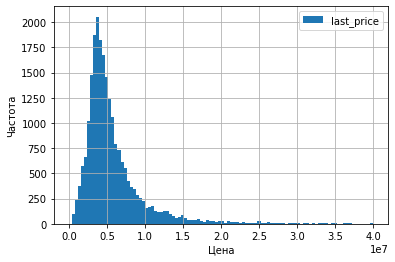

In [118]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,40000000))
data['last_price'].describe()
plt.xlabel('Цена');
plt.ylabel('Частота');

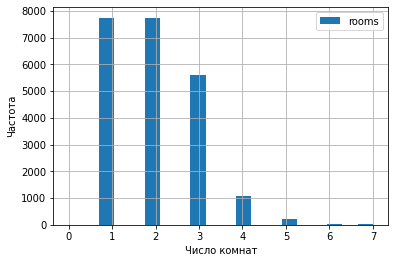

In [119]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, range = (0, 7))
plt.xlabel('Число комнат');
plt.ylabel('Частота');

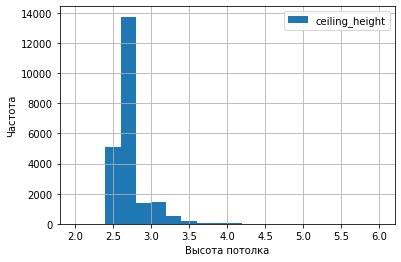

In [120]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, range = (2, 6))
data['ceiling_height'].describe()
plt.xlabel('Высота потолка');
plt.ylabel('Частота');

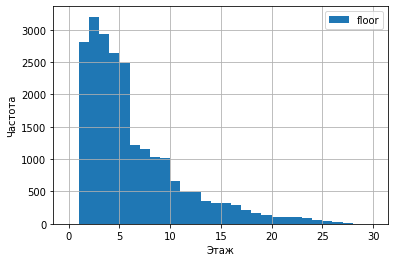

In [121]:
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, range = (0, 30))
data['floor'].describe()
plt.xlabel('Этаж');
plt.ylabel('Частота');

<AxesSubplot:xlabel='floor_category'>

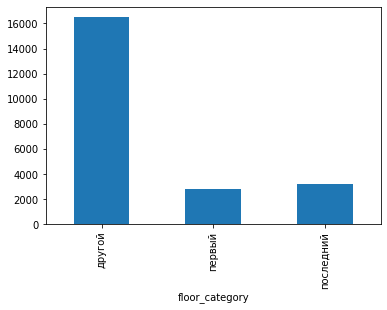

In [122]:
data.groupby(by='floor_category')['total_images'].count().plot(kind='bar')

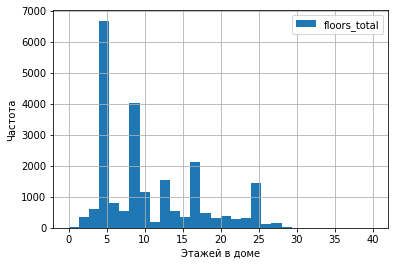

In [123]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, range = (0, 40))
data['floors_total'].describe()
plt.xlabel('Этажей в доме');
plt.ylabel('Частота');

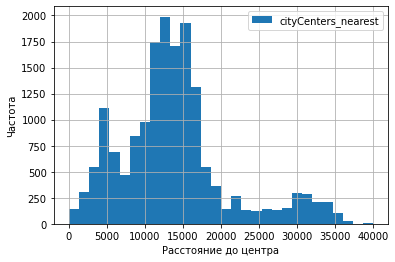

In [124]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, range = (0, 40000))
data['cityCenters_nearest'].describe()
plt.xlabel('Расстояние до центра');
plt.ylabel('Частота');

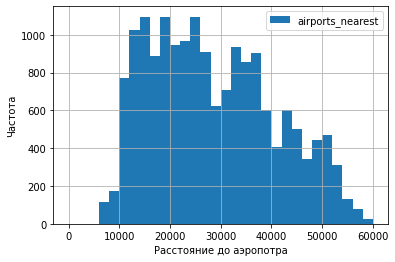

In [125]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, range = (0, 60000))
data['airports_nearest'].describe()
plt.xlabel('Расстояние до аэропотра');
plt.ylabel('Частота');

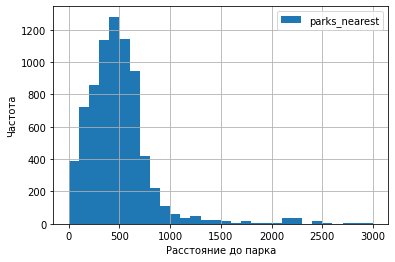

In [126]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, range = (0, 3000))
data['parks_nearest'].describe()
plt.xlabel('Расстояние до парка');
plt.ylabel('Частота');

count    22474.000000
mean         2.568346
std          1.790519
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

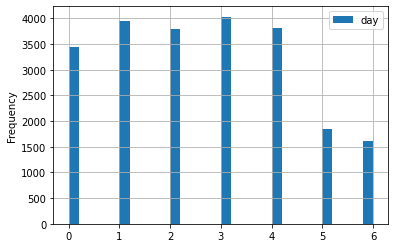

In [127]:
data.plot(y = 'day', kind = 'hist', bins = 30, grid=True, range = (0, 6))
data['day'].describe()


count    22474.000000
mean         6.398772
std          3.494312
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

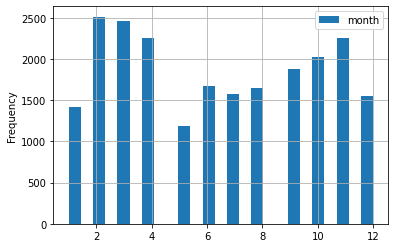

In [128]:
data.plot(y = 'month', kind = 'hist', bins = 25, grid=True, range = (1, 12))
data['month'].describe()

**Вывод**:
* Медианное значение общей площади это 52 м<sup>2</sup>, минимальное значение 13<sup>2</sup>, а максимальное аж 900<sup>2</sup>. Из-за больших отклонений среднее равняется 60.39 м<sup>2</sup>
* Медианное значение жилой площади это 34.63 м<sup>2</sup>, минимальное значение 2<sup>2</sup>, а максимальное 430<sup>2</sup>. Среднее равняется 60.39 м<sup>2</sup>. На гистограмме очевиден пик в районе 20 м<sup>2</sup>.
* Медианное значение площади кухни это 9 м<sup>2</sup>, минимальное значение 1.3<sup>2</sup>, а максимальное 112<sup>2</sup>. На графике много локальных максимумов.
* Медианное значение высоты потолков находится в пределах рекомендованных в России 2.65 м. В данных было множество выбросов, о которых я писал ранее.
* Большинство квартир находится на нижних до 4 этажах, а максимальный этаж - 33.
* Медианное значение этажей в домах - 9, также очевиден пик среди 5-этажек.
* Медианное значение расстояни до центра в 13101 метрах, однако разброс очень большой
* Медианное значение расстояни до аэропорта в 26765 метрах, однако разброс очень большой
* Медианное значение расстояни до парка в 455 метрах, однако разброс очень большой
* Квартиры продаются в будние лучше чем в выходные

#### Анализ days_exposition

count    19476.000000
mean       176.806788
std        209.989837
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1299.000000
Name: days_exposition, dtype: float64

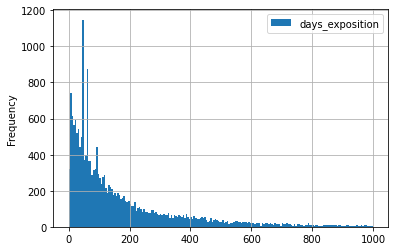

In [129]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid=True, range = (0,1000))
data['days_exposition'].describe()

count    19476.000000
mean       176.806788
std        209.989837
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1299.000000
Name: days_exposition, dtype: float64

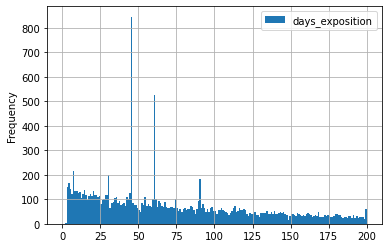

In [130]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid=True, range = (0,200))
data['days_exposition'].describe()

<AxesSubplot:ylabel='Frequency'>

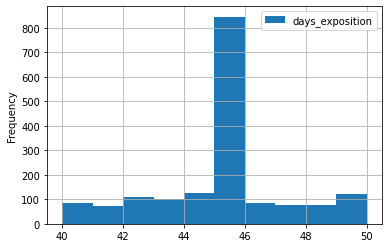

In [131]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 10, grid=True, range = (40,50))

<AxesSubplot:ylabel='Frequency'>

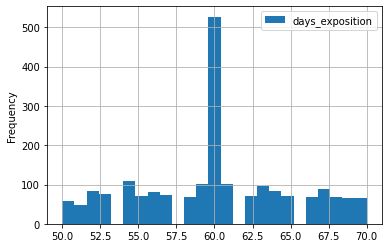

In [132]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 25, grid=True, range = (50,70))

<AxesSubplot:ylabel='Frequency'>

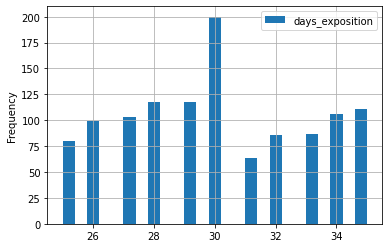

In [133]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 25, grid=True, range = (25,35))

<AxesSubplot:>

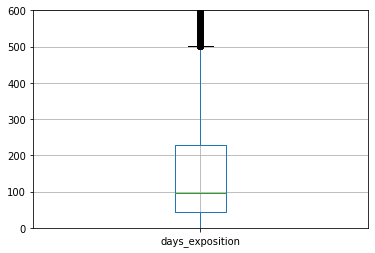

In [134]:
plt.ylim(0,600)
data.boxplot(column='days_exposition')

**Вывод:** Так как медиана и среднее сильно отличаются из-за разброса, то будем брать медиану. Так обычно квартиры продаются по 3 месяца(96 дней). Есть несколько ярковыраженных локальных максимумов. Исходя из диаграмма размаха, будем считать что значения дней от 0 до 510 нормальные, выше - аномальные.

**Дополнение к Вывод:** Опираясь на данные метода describe, можно сказать, что быстрые продажи - за 45 дней и меньше, а долгими можно считать те, которые продавались дольше 228 дней. Так же изучив моды на подробных гистограммах, очевидны моды на 30, 45 и 60 день. Изучив правила Яндекс.Недвижимости становится понятно, что это сроки публикаций, по истечению которых объявления снимали.

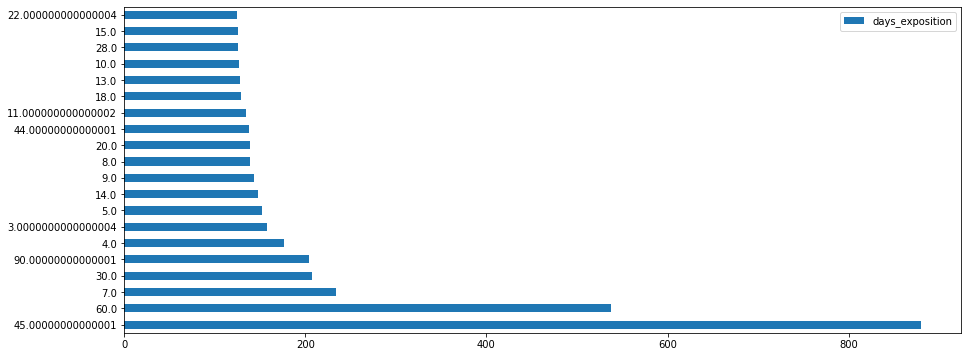

In [135]:
# check
# Моды на реальных данных

try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

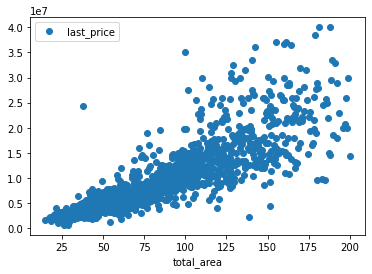

In [136]:
(data
    .pivot_table(index = 'total_area', values = 'last_price', aggfunc ='median')
    .plot(style = 'o')
);

In [137]:
data['total_area'].corr(data['last_price'])

0.7656582848073542

**Вывод:** Зависимость между ценой и общей площадью выражена сильно, коэффициент корреляции равен 0.76.

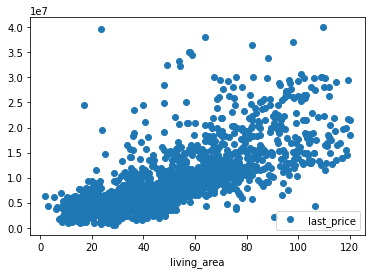

In [138]:
(data
    .pivot_table(index = 'living_area', values = 'last_price', aggfunc ='median')
    .plot(style = 'o')
);

In [139]:
data['living_area'].corr(data['last_price']);

**Вывод:** Зависимость между ценой и жилой площадью выражена чуть слабее, коэффициент корреляции равен 0.66.

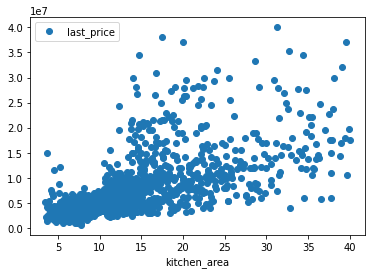

In [140]:
(data
    .pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc ='median')
    .plot(style = 'o')
);

In [141]:
data['kitchen_area'].corr(data['last_price'])

0.577937379660885

**Вывод:** Зависимость между ценой и площадью кухни выражена слабее чем у других площадей, коэффициент корреляции равен 0.57.

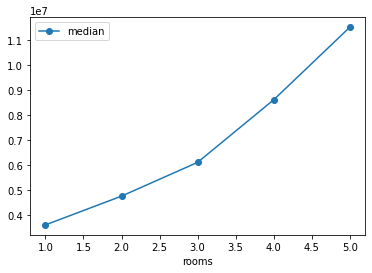

In [142]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count','median'])
pivot_table_rooms.columns = ['count', 'median']
pivot_table_rooms.query('count > 100').plot(y = 'median', style = 'o-');

In [143]:
data['rooms'].corr(data['last_price'])

0.47017275360601524

**Вывод:** Чем больше комнат, тем больше цена.

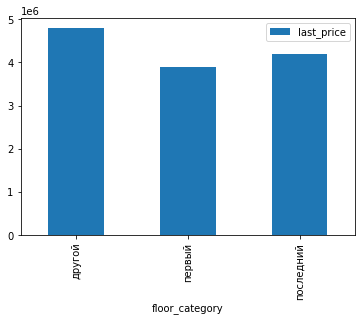

In [144]:
(data
    .pivot_table(index = 'floor_category', values = 'last_price', aggfunc ='median')
    .plot(kind = 'bar')
);

**Вывод:** По графику тяжело дать оценку, поскольку деление первый/последний/другой очень общее, и квартиры в категории другой могут быть разными. Однако очевидно, что цена квартиры на последнем этаже больше чем на первом.

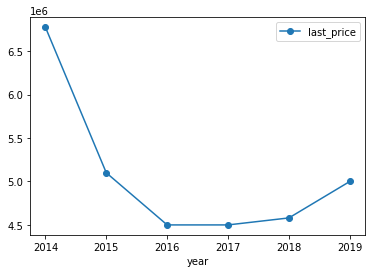

In [145]:
(data
    .pivot_table(index = 'year', values = 'last_price', aggfunc ='median')
    .plot(style = 'o-')
);

<AxesSubplot:xlabel='month'>

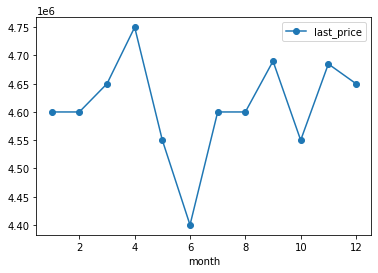

In [146]:
(data
    .pivot_table(index = 'month', values = 'last_price', aggfunc ='median')
    .plot(style = 'o-')
)

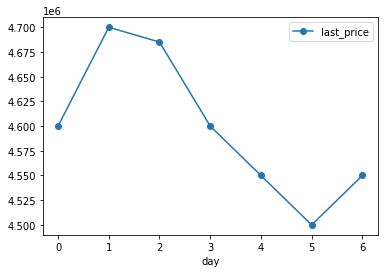

In [147]:
(data
    .pivot_table(index = 'day', values = 'last_price', aggfunc ='median')
    .plot(style = 'o-')
);

**Вывод:** Среди недели пик во вторник после которого идет спад до субботы. По месяцам можно увидеть, что есть некоторая сезоннность, самый дорогой метр в апреле и августе. По году видно что рынок сильно просел в 2015 году, и начал расти с 2016. Нужно было покупать квартиру в 2015.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,median,count,mean
locality_processed,,,
санкт-петербург,104000.0,14845,111165.8
поселок мурино,84239.1,525,85052.4
поселок шушары,76625.6,430,78107.2
деревня кудрово,94986.0,424,94876.3
всеволожск,65789.5,383,68633.6
пушкин,99744.2,353,102819.3
колпино,74723.8,334,75312.8
поселок парголово,91579.8,318,90236.3
гатчина,67647.1,303,68625.1


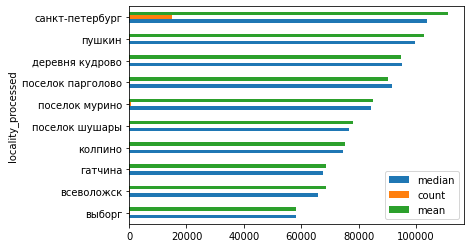

In [148]:
pivot_table_locality = data.pivot_table(index = 'locality_processed', 
                                        values = 'price_per_m', 
                                        aggfunc =['median', 'count', 'mean'])
pivot_table_locality.columns = ['median', 'count', 'mean']
pivot_table_locality = (pivot_table_locality
    .sort_values(by ='count', ascending=False)
    .round({'median': 1, 'mean': 1})
    .head(10)
)
display(pivot_table_locality);
(pivot_table_locality.sort_values(by ='median')
                     .plot(kind='barh'));

**Вывод:** Ожидаемо самый дорогой квадратный метр в Санкт-Петербурге. Далее идет Пушкин и Кудрово. В Выборге не только меньше всего объявлений, но и намименьшая цена за метр.

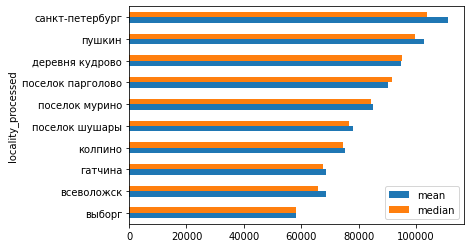

In [149]:
# check
(pivot_table_locality.sort_values(by ='median')[['mean', 'median']]
                     .plot(kind='barh'));

#### Как стоимость объектов зависит от расстояния до центра города.

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

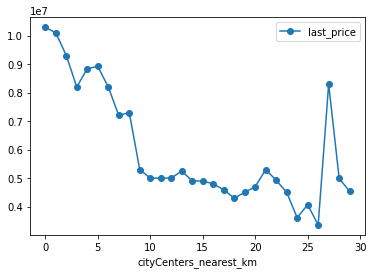

In [150]:
(data[data['locality_processed']=='санкт-петербург']
    .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc ='median')
    .plot(style = 'o-')
)

In [151]:
(data[data['locality_processed']=='санкт-петербург']
    .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc =['median','count'])\
)  

,median,count
,last_price,last_price
cityCenters_nearest_km,,
0.0,10290000.0,14
1.0,10100000.0,161
2.0,9300000.0,253
3.0,8200000.0,314
4.0,8840000.0,629
5.0,8920262.0,819
6.0,8200000.0,531
7.0,7200000.0,373


In [152]:
data[data['locality_processed']=='санкт-петербург']['cityCenters_nearest_km'].corr(data['last_price'])

-0.40829116392013853

**Вывод:** По графику можно выделить следующие особенности:
* Самый дорогой квадртаный метр находится на расстоянии 0, далее цены падают до 3км и снова поднимаются до 6км. Такие скачки могут объсяняться тем что в центре питера находится много разного жилья. 
* На участке от 9 до 19 заметно линейное падение. На этом промежутке можно однозначно сказать, что чем ближе жилье к центру, тем дороже квадратный метр.
* Адекватность оставшегося участка графика стоит под вопросом, так как у нас слишком мало наблюдений и сложно объсянить что же повлияло на такой результат

### Общий вывод

В ходе данного проекта был проанализирован датасет по недвижимости. Была проделана работа по заполнению пропусков, выявлению дубликатов, изменению типов данных. Были сделаны предположения о том почему могли произойти те или иные пропуски в данных. Для очищенных данных были добавлены столбцы, необходимые для анализа.
И так на цену квадратного метра в большей степени влияют:
* Общая площадь квартиры и площадь кухни.
* Расстояние до центра города.

Другие инсайты:
* Чем ближе число комнат к 3 - тем дешевле цена за метр.
* Заметна небольшая сезонность

В среднем продающаяся в Санкт петербурге квартира - это 52 м<sup>2</sup> двушка на 4 этаже девятиэтажки 

### Бонус

In [153]:
# check
import seaborn as sns

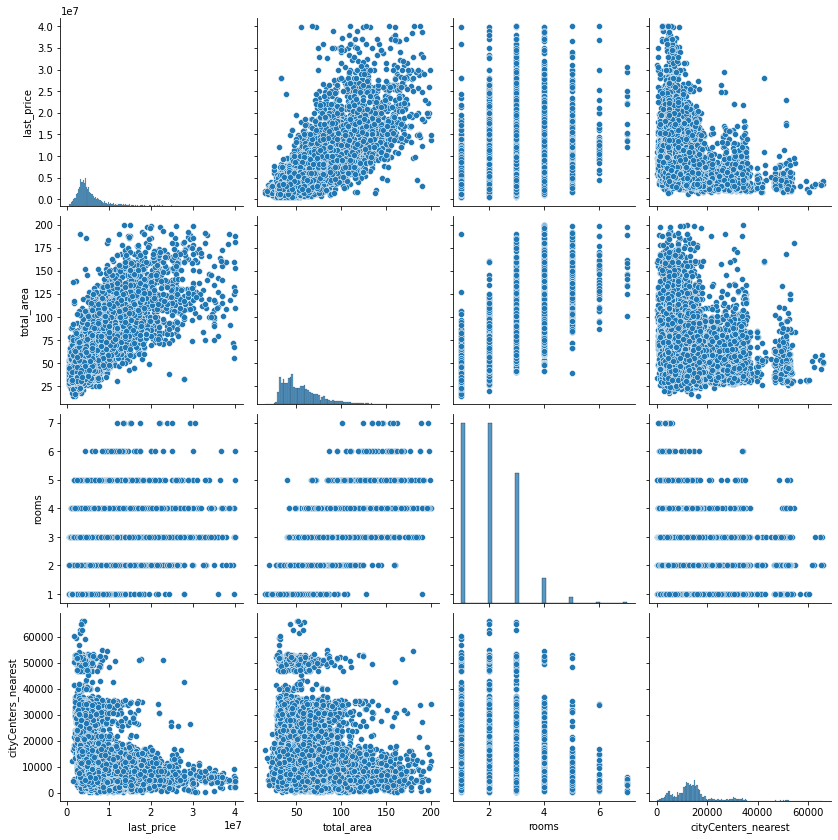

In [154]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


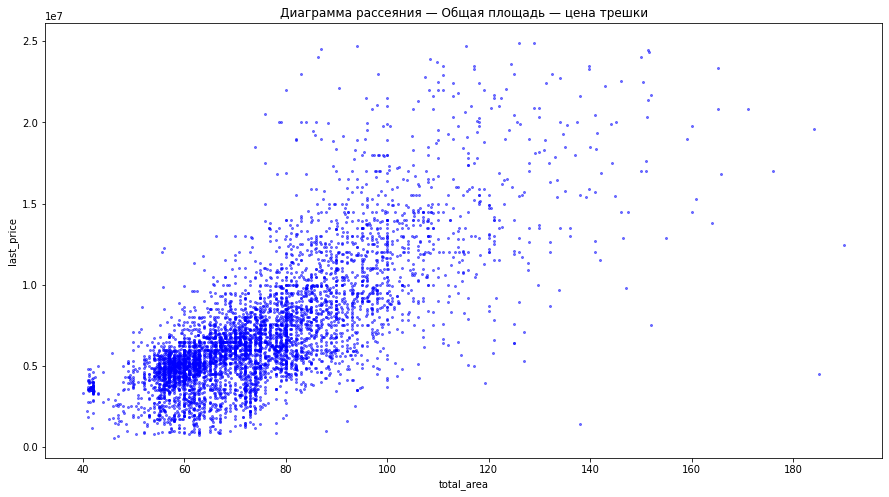

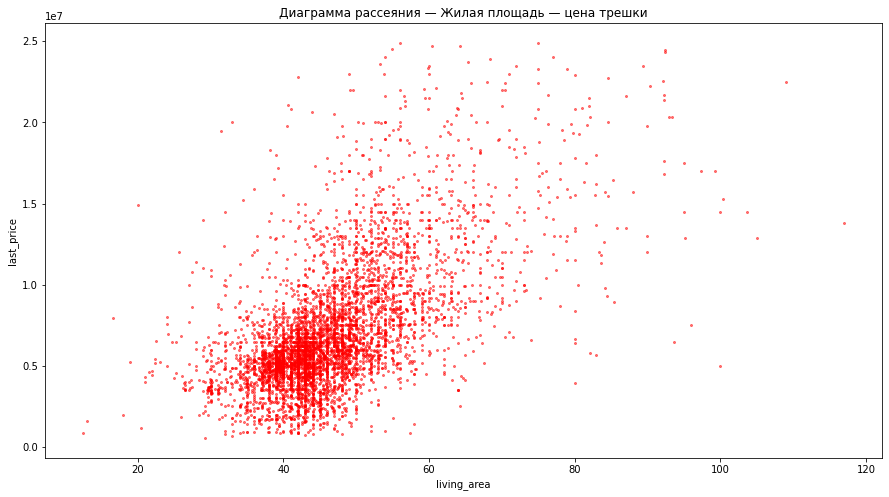

In [155]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');